Предобработка

Векторизация

Классификация


## Архитектура систем классификации

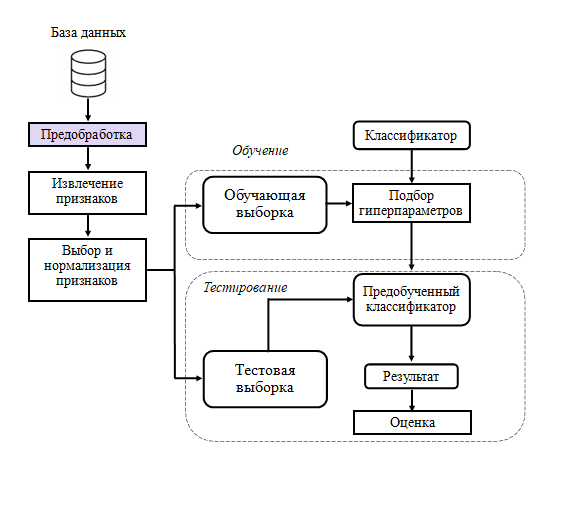

**Предобработка** текстовых данных - это преобразование исходных данных, с целью выделить из них релевантную информацию.

Предобработка текстовых данных состоит из следующих этапов:


*   Удаление пунктуации
*   Приведение всех слов к нижнему регистру
*   Удаление стоп-слов и/или часто встречаемых
*   Токенизация
*   Нормализация (лемматизация и стемминг)







## Токенизация

Токенизация - это разделение текста на значимые единицы

Что может являться значимой единицей для текста?

In [ ]:
#установка библиотеки
!pip install nltk

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np

Data=pd.read_csv('/content/sample_data/data (2).csv')
Data

id_post  owner_id        id        date  \
0     43666349 -15755094  43666349  1696602868   
1     43665942 -15755094  43665942  1696600704   
2     43665632 -15755094  43665632  1696598857   
3     43665370 -15755094  43665370  1696596978   
4     43665155 -15755094  43665155  1696595817   
...        ...       ...       ...         ...   
4995  43644567 -15755094  43644567  1696438277   
4996  43644343 -15755094  43644343  1696436597   
4997  43644105 -15755094  43644105  1696434986   
4998  43643936 -15755094  43643936  1696433618   
4999  43643869 -15755094  43643869  1696433175   

                                            description  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                               РИА Новости, 06.10.2023   
...                                                 ...   
4995                                                NaN   
4996  Главу палаты представителей Кевина Маккарти — ...   
4997                                                NaN   
4998                                                NaN   
4999                                                NaN   

                                             title  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                        Колонка Александра Дугина   
...                                            ...   
4995                                           NaN   
4996  США погружаются в хаос из-за денег и Украины   
4997                                           NaN   
4998                                           NaN   
4999                                           NaN   

                                                   text   views  likes  \
0     Планируется, что по итогам обсуждений будет со...   12721     49   
1     Американская валюта дешевеет на 60 копеек — до...   22750     75   
2     Сергей Шойгу во время поездки на полигоны Южно...   47903    432   
3     Причина — задержание силовиками журналиста "Ро...   29309     74   
4     "Тема Империи неизбежно будет выходить на перв...   23060     46   
...                                                 ...     ...    ...   
4995  В немецком Дюссельдорфе прошли акции протеста ...   64323    476   
4996  Главу палаты представителей Кевина Маккарти — ...  150094    199   
4997  В ЛНР продолжают восстанавливать лечебные учре...   92294    356   
4998  Путин принял участие в заседании попечительско...   48943    145   
4999  Cуд Молдавии постановил признать оппозиционную...   67700    113   

      reposts  
0           0  
1          20  
2          18  
3           8  
4           7  
...       ...  
4995       19  
4996       17  
4997        7  
4998        9  
4999       13  

[5000 rows x 10 columns]

In [ ]:
Data.dropna(subset=['text'], inplace=True)

In [ ]:
Data

id_post  owner_id        id        date  \
0     43666349 -15755094  43666349  1696602868   
1     43665942 -15755094  43665942  1696600704   
2     43665632 -15755094  43665632  1696598857   
3     43665370 -15755094  43665370  1696596978   
4     43665155 -15755094  43665155  1696595817   
...        ...       ...       ...         ...   
4995  43644567 -15755094  43644567  1696438277   
4996  43644343 -15755094  43644343  1696436597   
4997  43644105 -15755094  43644105  1696434986   
4998  43643936 -15755094  43643936  1696433618   
4999  43643869 -15755094  43643869  1696433175   

                                            description  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                               РИА Новости, 06.10.2023   
...                                                 ...   
4995                                                NaN   
4996  Главу палаты представителей Кевина Маккарти — ...   
4997                                                NaN   
4998                                                NaN   
4999                                                NaN   

                                             title  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                        Колонка Александра Дугина   
...                                            ...   
4995                                           NaN   
4996  США погружаются в хаос из-за денег и Украины   
4997                                           NaN   
4998                                           NaN   
4999                                           NaN   

                                                   text   views  likes  \
0     Планируется, что по итогам обсуждений будет со...   12721     49   
1     Американская валюта дешевеет на 60 копеек — до...   22750     75   
2     Сергей Шойгу во время поездки на полигоны Южно...   47903    432   
3     Причина — задержание силовиками журналиста "Ро...   29309     74   
4     "Тема Империи неизбежно будет выходить на перв...   23060     46   
...                                                 ...     ...    ...   
4995  В немецком Дюссельдорфе прошли акции протеста ...   64323    476   
4996  Главу палаты представителей Кевина Маккарти — ...  150094    199   
4997  В ЛНР продолжают восстанавливать лечебные учре...   92294    356   
4998  Путин принял участие в заседании попечительско...   48943    145   
4999  Cуд Молдавии постановил признать оппозиционную...   67700    113   

      reposts  
0           0  
1          20  
2          18  
3           8  
4           7  
...       ...  
4995       19  
4996       17  
4997        7  
4998        9  
4999       13  

[4900 rows x 10 columns]

In [ ]:
Data.reset_index(drop=True, inplace=True)

In [ ]:
#исходные текстовые данные
string = Data['text'].to_string()

In [ ]:
string


'0       Планируется, что по итогам обсуждений будет со...\n1       Американская валюта дешевеет на 60 копеек — до...\n2       Сергей Шойгу во время поездки на полигоны Южно...\n3       Причина — задержание силовиками журналиста "Ро...\n4       "Тема Империи неизбежно будет выходить на перв...\n5       "Это не означает заявления о намерении проведе...\n6       #ПРЯМАЯТРАНСЛЯЦИЯ \\nВстреча президентов России...\n7       Объявлены победители конкурса комичных фотогра...\n8       Брали котят через интернет и всячески издевали...\n9       Эти люди парят над водой? Или они зависли прям...\n10      Ночью украинские военные также попытались атак...\n11      Накануне глава Евросовета, а также лидеры Фран...\n12      ⚡⚡⚡\\nЗа ее борьбу против угнетения женщин в Ир...\n13      Швеция выделила Украине уже 14 пакетов военной...\n14      "Путин заявил, что в украинском кризисе речь и...\n15      Принято решение внести поправки в Налоговый ко...\n16      Юаня – на 11 копеек, до 13,84 рубля, евро – н

In [ ]:
import re
string = re.sub(r'\n[0-9]||\\n||[0-9]||[А-я][а-я]\...', '', string)
string

'       Планируется, что по итогам обсуждений будет        Американская валюта дешевеет на  копеек —        Сергей Шойгу во время поездки на полигоны Юж       Причина — задержание силовиками журналиста "       "Тема Империи неизбежно будет выходить на пе       "Это не означает заявления о намерении прове       #ПРЯМАЯТРАНСЛЯЦИЯ Встреча президентов Росс       Объявлены победители конкурса комичных фотог       Брали котят через интернет и всячески издева       Эти люди парят над водой? Или они зависли пр      Ночью украинские военные также попытались ат      Накануне глава Евросовета, а также лидеры Фр      ⚡⚡⚡За ее борьбу против угнетения женщин в       Швеция выделила Украине уже  пакетов военн      "Путин заявил, что в украинском кризисе речь и...      Принято решение внести поправки в Налоговый       Юаня – на  копеек, до , рубля, евро –       Он проинспектировал летно-испытательную стан      Накануне этот вопрос поднял во время выступл      На %. Так, ЕС на начало сентября выделил .

In [ ]:
#токенизируем текст и записываем в отдельную переменную
tokens = word_tokenize(string)
print(tokens)

['Планируется', ',', 'что', 'по', 'итогам', 'обсуждений', 'будет', 'Американская', 'валюта', 'дешевеет', 'на', 'копеек', '—', 'Сергей', 'Шойгу', 'во', 'время', 'поездки', 'на', 'полигоны', 'Юж', 'Причина', '—', 'задержание', 'силовиками', 'журналиста', '``', '``', 'Тема', 'Империи', 'неизбежно', 'будет', 'выходить', 'на', 'пе', '``', 'Это', 'не', 'означает', 'заявления', 'о', 'намерении', 'прове', '#', 'ПРЯМАЯТРАНСЛЯЦИЯ', 'Встреча', 'президентов', 'Росс', 'Объявлены', 'победители', 'конкурса', 'комичных', 'фотог', 'Брали', 'котят', 'через', 'интернет', 'и', 'всячески', 'издева', 'Эти', 'люди', 'парят', 'над', 'водой', '?', 'Или', 'они', 'зависли', 'пр', 'Ночью', 'украинские', 'военные', 'также', 'попытались', 'ат', 'Накануне', 'глава', 'Евросовета', ',', 'а', 'также', 'лидеры', 'Фр', '⚡⚡⚡За', 'ее', 'борьбу', 'против', 'угнетения', 'женщин', 'в', 'Швеция', 'выделила', 'Украине', 'уже', 'пакетов', 'военн', '``', 'Путин', 'заявил', ',', 'что', 'в', 'украинском', 'кризисе', 'речь', 'и', '.

## Удаление пунктуации

In [ ]:
from string import punctuation

In [ ]:
#записываем в переменную punctuations список существующих пунктуационных знаков
punctuations = list(punctuation)
#print(punctuations)

In [ ]:
punctuations.append('...')
punctuations.append('``')
punctuations.append('—')

In [ ]:
#удаляем пунктуацию из наших токенов
tokens_without_punct = [i for i in tokens if i not in punctuations]
print(tokens_without_punct)

['Планируется', 'что', 'по', 'итогам', 'обсуждений', 'будет', 'Американская', 'валюта', 'дешевеет', 'на', 'копеек', 'Сергей', 'Шойгу', 'во', 'время', 'поездки', 'на', 'полигоны', 'Юж', 'Причина', 'задержание', 'силовиками', 'журналиста', 'Тема', 'Империи', 'неизбежно', 'будет', 'выходить', 'на', 'пе', 'Это', 'не', 'означает', 'заявления', 'о', 'намерении', 'прове', 'ПРЯМАЯТРАНСЛЯЦИЯ', 'Встреча', 'президентов', 'Росс', 'Объявлены', 'победители', 'конкурса', 'комичных', 'фотог', 'Брали', 'котят', 'через', 'интернет', 'и', 'всячески', 'издева', 'Эти', 'люди', 'парят', 'над', 'водой', 'Или', 'они', 'зависли', 'пр', 'Ночью', 'украинские', 'военные', 'также', 'попытались', 'ат', 'Накануне', 'глава', 'Евросовета', 'а', 'также', 'лидеры', 'Фр', '⚡⚡⚡За', 'ее', 'борьбу', 'против', 'угнетения', 'женщин', 'в', 'Швеция', 'выделила', 'Украине', 'уже', 'пакетов', 'военн', 'Путин', 'заявил', 'что', 'в', 'украинском', 'кризисе', 'речь', 'и', 'Принято', 'решение', 'внести', 'поправки', 'в', 'Налоговый',

## Понижение регистра слов

In [ ]:
low_tokens = [i.lower() for i in tokens_without_punct]
print(low_tokens)

['планируется', 'что', 'по', 'итогам', 'обсуждений', 'будет', 'американская', 'валюта', 'дешевеет', 'на', 'копеек', 'сергей', 'шойгу', 'во', 'время', 'поездки', 'на', 'полигоны', 'юж', 'причина', 'задержание', 'силовиками', 'журналиста', 'тема', 'империи', 'неизбежно', 'будет', 'выходить', 'на', 'пе', 'это', 'не', 'означает', 'заявления', 'о', 'намерении', 'прове', 'прямаятрансляция', 'встреча', 'президентов', 'росс', 'объявлены', 'победители', 'конкурса', 'комичных', 'фотог', 'брали', 'котят', 'через', 'интернет', 'и', 'всячески', 'издева', 'эти', 'люди', 'парят', 'над', 'водой', 'или', 'они', 'зависли', 'пр', 'ночью', 'украинские', 'военные', 'также', 'попытались', 'ат', 'накануне', 'глава', 'евросовета', 'а', 'также', 'лидеры', 'фр', '⚡⚡⚡за', 'ее', 'борьбу', 'против', 'угнетения', 'женщин', 'в', 'швеция', 'выделила', 'украине', 'уже', 'пакетов', 'военн', 'путин', 'заявил', 'что', 'в', 'украинском', 'кризисе', 'речь', 'и', 'принято', 'решение', 'внести', 'поправки', 'в', 'налоговый',

## Удаление стоп-слов

Стоп-слова - это слова, не содержащие в себе смысловой нагрузки

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#записываем в переменную stopwords стоп-слова для русского языка
stopwords = nltk.corpus.stopwords.words('russian')
print(stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Все ли слова из этих подходят для задачи сентимент-анализа?

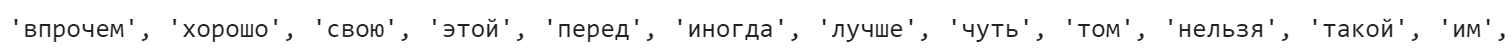

In [ ]:
stopwords.append('также')
stopwords.append('⚡⚡⚡')

In [ ]:
#удаляем стоп-слова из нашего текста
words_without_stop = [i for i in low_tokens if i not in stopwords]
print(words_without_stop)

['планируется', 'итогам', 'обсуждений', 'американская', 'валюта', 'дешевеет', 'копеек', 'сергей', 'шойгу', 'время', 'поездки', 'полигоны', 'юж', 'причина', 'задержание', 'силовиками', 'журналиста', 'тема', 'империи', 'неизбежно', 'выходить', 'пе', 'это', 'означает', 'заявления', 'намерении', 'прове', 'прямаятрансляция', 'встреча', 'президентов', 'росс', 'объявлены', 'победители', 'конкурса', 'комичных', 'фотог', 'брали', 'котят', 'интернет', 'всячески', 'издева', 'люди', 'парят', 'водой', 'зависли', 'пр', 'ночью', 'украинские', 'военные', 'попытались', 'ат', 'накануне', 'глава', 'евросовета', 'лидеры', 'фр', '⚡⚡⚡за', 'борьбу', 'против', 'угнетения', 'женщин', 'швеция', 'выделила', 'украине', 'пакетов', 'военн', 'путин', 'заявил', 'украинском', 'кризисе', 'речь', 'принято', 'решение', 'внести', 'поправки', 'налоговый', 'юаня', '–', 'копеек', 'рубля', 'евро', '–', 'проинспектировал', 'летно-испытательную', 'стан', 'накануне', 'вопрос', 'поднял', 'время', 'выступл', 'ес', 'начало', 'сентя

In [ ]:
words_without_stop=np.array(words_without_stop)

# Нормализация

Нормализация - приведение всех слов к единой форме.
Нормализация может быть осуществлена двумя методами:


*   Лемматизация
*   Стемминг



### Лемматизация

Лематизация - приведение всех слов к их начальной форме.

In [ ]:
from numpy.lib.arraysetops import setxor1d
!pip install pymorphy2 > None
from sklearn.feature_extraction.text import CountVectorizer
import pymorphy2
str1='Коты любят мышей мыши любят сыр'
morph = pymorphy2.MorphAnalyzer()
lemms = [morph.parse(i)[0].normal_form for i in str1]
vectorizer = CountVectorizer()
X_BoW = vectorizer.fit_transform(lemms).toarray()
X_BoW

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
!pip install pymorphy2 > None

In [ ]:
import pymorphy2

In [ ]:
#записываем в morph лемматизатор
morph = pymorphy2.MorphAnalyzer()

In [ ]:
#лемматизируем наш получившийся текст
lemms = [morph.parse(i)[0].normal_form for i in words_without_stop]
print(lemms)

['планироваться', 'итог', 'обсуждение', 'американский', 'валюта', 'дешеветь', 'копейка', 'сергей', 'шойгу', 'время', 'поездка', 'полигон', 'юж', 'причина', 'задержание', 'силовик', 'журналист', 'тема', 'империя', 'неизбежно', 'выходить', 'пе', 'это', 'означать', 'заявление', 'намерение', 'пров', 'прямаятрансляция', 'встреча', 'президент', 'росс', 'объявить', 'победитель', 'конкурс', 'комичный', 'фотога', 'брать', 'котёнок', 'интернет', 'всячески', 'издева', 'человек', 'парить', 'вода', 'зависнуть', 'пр', 'ночью', 'украинский', 'военный', 'попытаться', 'ата', 'накануне', 'глава', 'евросовет', 'лидер', 'фр', '⚡⚡⚡з', 'борьба', 'против', 'угнетение', 'женщина', 'швеция', 'выделить', 'украина', 'пакет', 'военна', 'путин', 'заявить', 'украинский', 'кризис', 'речь', 'принять', 'решение', 'внести', 'поправка', 'налоговый', 'юань', '–', 'копейка', 'рубль', 'евро', '–', 'проинспектировать', 'летно-испытательный', 'стан', 'накануне', 'вопрос', 'поднять', 'время', 'выступлый', 'ес', 'начало', 'сен

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
lemms = [morph.parse(i)[0].normal_form for i in words_without_stop]
vectorizer = CountVectorizer()
X_BoW = vectorizer.fit_transform(lemms).toarray()

### Стемминг

Стемминг - выделение основы слова

In [ ]:
from nltk.stem.snowball import RussianStemmer

In [ ]:
#записываем в stemmer функцию стемминга
stemmer = RussianStemmer()

In [ ]:
#проводим стемминг
stems = [stemmer.stem(i) for i in words_without_stop]
print(stems)

['планир', 'итог', 'обсужден', 'американск', 'валют', 'дешевеет', 'копеек', 'серг', 'шойг', 'врем', 'поездк', 'полигон', 'юж', 'причин', 'задержан', 'силовик', 'журналист', 'тем', 'импер', 'неизбежн', 'выход', 'пе', 'эт', 'означа', 'заявлен', 'намерен', 'пров', 'прямаятрансляц', 'встреч', 'президент', 'росс', 'объявл', 'победител', 'конкурс', 'комичн', 'фотог', 'брал', 'кот', 'интернет', 'всяческ', 'издев', 'люд', 'пар', 'вод', 'зависл', 'пр', 'ноч', 'украинск', 'воен', 'попыта', 'ат', 'наканун', 'глав', 'евросовет', 'лидер', 'фр', '⚡⚡⚡за', 'борьб', 'прот', 'угнетен', 'женщин', 'швец', 'выдел', 'украин', 'пакет', 'воен', 'путин', 'заяв', 'украинск', 'кризис', 'реч', 'принят', 'решен', 'внест', 'поправк', 'налогов', 'юан', '–', 'копеек', 'рубл', 'евр', '–', 'проинспектирова', 'летно-испытательн', 'стан', 'наканун', 'вопрос', 'подня', 'врем', 'выступл', 'ес', 'нача', 'сентябр', 'выдел', 'дня', 'наш', 'руководител', 'го', 'харьковск', 'област', 'звуч', 'сигна', 'воздушн', 'добав', 'соглас

In [ ]:
import re

def preprocessing(text):

  text = re.sub(r'\n[0-9]||\\n||[0-9]||[А-я][а-я]\...', '', text)
  tokens = word_tokenize(text)

  tokens_without_punct = [i for i in tokens if i not in punctuations]
  low_tokens = [i.lower() for i in tokens_without_punct]
  words_without_stop = [i for i in low_tokens if i not in stopwords]
  lemms = [morph.parse(i)[0].normal_form for i in words_without_stop]
  res=' '.join(lemms)
  return res

In [ ]:
Data['preproc']=''
preprocessing_text=''
for i in range(len(Data)):
  preprocessing_text=preprocessing(Data['text'][i])
  Data['preproc'][i]=preprocessing_text


<ipython-input-28-0b0d76d29cb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['preproc'][i]=preprocessing_text


In [ ]:
df = pd.DataFrame(columns=range(11))
df

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Index: []

In [ ]:
Data.head()

id_post  owner_id        id        date              description  \
0  43666349 -15755094  43666349  1696602868                      NaN   
1  43665942 -15755094  43665942  1696600704                      NaN   
2  43665632 -15755094  43665632  1696598857                      NaN   
3  43665370 -15755094  43665370  1696596978                      NaN   
4  43665155 -15755094  43665155  1696595817  РИА Новости, 06.10.2023   

                       title  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4  Колонка Александра Дугина   

                                                text  views  likes  reposts  \
0  Планируется, что по итогам обсуждений будет со...  12721     49        0   
1  Американская валюта дешевеет на 60 копеек — до...  22750     75       20   
2  Сергей Шойгу во время поездки на полигоны Южно...  47903    432       18   
3  Причина — задержание силовиками журналиста "Ро...  29309     74        8   
4  "Тема Империи неизбежно будет выходить на перв...  23060     46        7   

                                             preproc  
0  планироваться итог обсуждение согласовать совм...  
1         американский валюта дешеветь копейка рубль  
2  сергей шойгу время поездка полигон южный военн...  
3  причина задержание силовик журналист российски...  
4  тема империя неизбежно выходить первый плермин...

Можно ли применять и лемматизацию и стемминг одновременно (последовательно)? Если да, то в каком порядке?

In [ ]:
Data.to_csv('data.csv', index=False)
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Data['preproc']

0       планироваться итог обсуждение согласовать совм...
1              американский валюта дешеветь копейка рубль
2       сергей шойгу время поездка полигон южный военн...
3       причина задержание силовик журналист российски...
4       тема империя неизбежно выходить первый плермин...
                              ...                        
4895    немецкий дюссельдорф пройти акция протест прот...
4896    глава палата представитель кевин маккарти трет...
4897    лнр продолжать восстанавливать лечебный учреди...
4898    путин принять участие заседание попечительский...
4899    cуд молдавия постановить признать оппозиционны...
Name: preproc, Length: 4900, dtype: object

In [ ]:
import itertools

result =list(itertools.chain(Data['preproc']))
result

In [ ]:
result=[]
for i in range(len(Data)):
    result.append(Data.loc[i]['preproc'])

## Мешок слов (Bag of Words, BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_BoW = vectorizer.fit_transform(result).toarray()
X_BoW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_BoW.shape

(4900, 1066)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_tf_idf = vectorizer.fit_transform(result).toarray()
print(X_tf_idf[:10])


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.2330155  0.         0.2330155  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.23578483]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Word2Vec

In [ ]:
import gensim.downloader as api

In [ ]:
#загрузка предобученную модель
wv = api.load('word2vec-ruscorpora-300')

In [ ]:
#список слов в данной модели
list(wv.index_to_key)[:10]

['весь_DET',
 'человек_NOUN',
 'мочь_VERB',
 'год_NOUN',
 'сказать_VERB',
 'время_NOUN',
 'говорить_VERB',
 'становиться_VERB',
 'знать_VERB',
 'самый_DET']

In [ ]:
len(list(wv.index_to_key))

184973

In [ ]:
#создание списка слов без частей речи
vocab = []
for w in list(wv.index_to_key):
  vocab.append(w.split('_')[0])

In [ ]:
vectors_word = []
vectors_text=[]

for i in range(len(Data)):
  cur_sen=Data.loc[i]['preproc'].split()
  for word in cur_sen:
    if word in vocab:
    #vocab.index(i) - находит идекс в vocab
    #list(wv.index_to_key)[vocab.index(i)] - выводит слово с его частью речи
      vectors_word.append(wv[list(wv.index_to_key)[vocab.index(word)]])
    else:
      vectors_word.append(np.zeros(300))
  vector_text = np.mean(vectors_word, axis = 0)
  vectors_text.append(vector_text)

In [ ]:
print(vectors_text[10:100])

[array([ 0.01116344,  0.0048346 , -0.00672095,  0.01721831, -0.01834526,
        0.00401658,  0.00467096,  0.00131801,  0.00951465, -0.00766068,
        0.02276533, -0.02453612, -0.0095939 , -0.01434557,  0.01413321,
        0.00826266,  0.02346715,  0.00095171,  0.02032413,  0.00996028,
        0.02587461,  0.01960182, -0.03217244,  0.01678812,  0.00577408,
       -0.00619097,  0.01412837, -0.02278245, -0.00260289, -0.00489974,
        0.01594133,  0.02174855,  0.02999034, -0.01804758,  0.02033511,
        0.00578124, -0.00486988,  0.01108925, -0.00684329,  0.01049409,
        0.01287398, -0.00823965,  0.00506031, -0.00466569, -0.0067068 ,
        0.00249074,  0.01480148,  0.01056844,  0.00531509, -0.00944507,
       -0.01061141, -0.00607973, -0.00779964,  0.00824093,  0.02427685,
       -0.01571846, -0.02288681, -0.02313377, -0.00505092, -0.01315203,
       -0.01875065, -0.00044469,  0.01278345,  0.00563336,  0.00464427,
       -0.00915467, -0.01045386,  0.00622477, -0.00996981,  0.0

In [ ]:
print(vectors_word[:100])


[array([ 3.20820250e-02,  6.70414232e-03, -5.40019982e-02, -4.96886484e-02,
        3.79527383e-03,  2.27210857e-03,  4.01898697e-02,  3.89363840e-02,
       -3.46492790e-02,  3.26548107e-02,  5.03017977e-02,  1.29741915e-02,
       -5.14758751e-02, -5.42381331e-02,  2.51940228e-02,  1.44627333e-01,
        4.42510769e-02, -4.77218926e-02,  1.26290070e-02, -4.15009707e-02,
        3.59877981e-02,  4.58246954e-02, -1.05074331e-01, -8.49695411e-03,
        5.81043810e-02,  2.47489195e-02, -9.89431937e-05, -1.10617124e-01,
        4.66388427e-02,  5.09541295e-02, -5.14413230e-02,  3.56247500e-02,
       -2.00296063e-02,  6.78320378e-02,  5.73463179e-02, -3.41587365e-02,
       -3.86011526e-02,  1.31564122e-02, -2.03504469e-02, -1.46244625e-02,
        3.19282003e-02, -5.13688475e-02,  5.52479317e-03, -9.76997614e-02,
       -9.08972323e-02, -6.43496364e-02,  4.78500165e-02,  1.26798749e-02,
       -2.77870838e-02,  4.29822616e-02, -7.38936141e-02, -2.76450850e-02,
       -1.15123175e-01, 

In [ ]:
vectors_text = [x for x in vectors_text if type(x) == np.ndarray]
X_BoW = [x for x in X_BoW if type(x) == np.ndarray]
X_tf_idf = [x for x in X_tf_idf if type(x) == np.ndarray]

In [ ]:
df_Word2Vec = pd.DataFrame(vectors_text)
df_Word2Vec.to_csv('vectorsW2V.csv', index=False)

df_BoW=pd.DataFrame(X_BoW)
df_BoW.to_csv('vectorsBoW.csv', index=False)

df_tf_idf=pd.DataFrame(X_tf_idf)
df_tf_idf.to_csv('vectorstf_idf.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Взять 1 любой полученный список векторов из предыдущей лабы

2. Разделить данные на обучающее и тестовое множество

3. Выбрать метрику для релевантности поста (лайки/репосты/...). Сгруппировать все данные в несколько классов (популярный/непопулярный пост).

популярный пост - большое количество лайков

2 класса - популярный пост/непопулярный пост

In [ ]:
metric=Data['likes'].describe()
metric

count    4900.000000
mean      334.986122
std       272.166243
min        46.000000
25%       175.000000
50%       251.500000
75%       417.000000
max      1632.000000
Name: likes, dtype: float64

In [ ]:
relevant_val=334
Data['popularity']=''
for i in range(len(Data)):
  if Data['likes'][i]<relevant_val:
    Data['popularity'][i]=0
  else:
    Data['popularity'][i]=1
Data.head()

<ipython-input-73-1bad9f57edee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['popularity'][i]=0
<ipython-input-73-1bad9f57edee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['popularity'][i]=1


id_post  owner_id        id        date              description  \
0  43666349 -15755094  43666349  1696602868                      NaN   
1  43665942 -15755094  43665942  1696600704                      NaN   
2  43665632 -15755094  43665632  1696598857                      NaN   
3  43665370 -15755094  43665370  1696596978                      NaN   
4  43665155 -15755094  43665155  1696595817  РИА Новости, 06.10.2023   

                       title  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4  Колонка Александра Дугина   

                                                text  views  likes  reposts  \
0  Планируется, что по итогам обсуждений будет со...  12721     49        0   
1  Американская валюта дешевеет на 60 копеек — до...  22750     75       20   
2  Сергей Шойгу во время поездки на полигоны Южно...  47903    432       18   
3  Причина — задержание силовиками журналиста "Ро...  29309     74        8   
4  "Тема Империи неизбежно будет выходить на перв...  23060     46        7   

                                             preproc popularity  
0  планироваться итог обсуждение согласовать совм...          0  
1         американский валюта дешеветь копейка рубль          0  
2  сергей шойгу время поездка полигон южный военн...          1  
3  причина задержание силовик журналист российски...          0  
4  тема империя неизбежно выходить первый плермин...          0

In [ ]:
from sklearn.model_selection import train_test_split
X=X_BoW
Y=Data['popularity']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    shuffle = True,
    random_state=42,
    stratify = None)

4. Обучить минимум 3 классификатора


In [ ]:
from sklearn.linear_model import LogisticRegression
#классификатор
clf = LogisticRegression(
        penalty = 'l2', #{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 100, #int, default=100
        n_jobs = -1, #int, default=None
)

In [ ]:
for i in X_train:
  print(type(i))

In [ ]:
y_train=y_train.astype('int')
y_train

4666    1
1943    0
3400    1
843     0
2580    0
       ..
4426    0
466     1
3092    1
3772    0
860     1
Name: popularity, Length: 3920, dtype: int64

In [ ]:
y_test=y_test.astype('int')

In [ ]:
#предобученный классификатор
clf_pretrained = clf.fit(X_train, y_train)

In [ ]:
clf_pretrained

LogisticRegression(C=0.2, class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
#результат предсказания
y_predict = clf_pretrained.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
y_test

4657    0
3539    0
907     0
4353    0
3745    1
       ..
3207    1
1539    1
964     1
168     0
3662    0
Name: popularity, Length: 980, dtype: object

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, digits = 8))

              precision    recall  f1-score   support

           0  0.92380952 1.00000000 0.96039604       582
           1  1.00000000 0.87939698 0.93582888       398

    accuracy                      0.95102041       980
   macro avg  0.96190476 0.93969849 0.94811246       980
weighted avg  0.95475219 0.95102041 0.95041876       980



In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf

SVC()

In [ ]:
y_predict_svm = clf.predict(X_test)
y_predict_svm

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_svm, digits = 4))

              precision    recall  f1-score   support

           0     0.9238    1.0000    0.9604       582
           1     1.0000    0.8794    0.9358       398

    accuracy                         0.9510       980
   macro avg     0.9619    0.9397    0.9481       980
weighted avg     0.9548    0.9510    0.9504       980



In [ ]:
from sklearn.svm import LinearSVC
clf_lsvc = LinearSVC(
        penalty = 'l2', #{‘l1’, ‘l2’}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 2000 #int, default=1000
)
clf_lsvc = clf_lsvc.fit(X_train, y_train)
y_predict_lsvc = clf_lsvc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_lsvc, digits = 8))

              precision    recall  f1-score   support

           0  0.92380952 1.00000000 0.96039604       582
           1  1.00000000 0.87939698 0.93582888       398

    accuracy                      0.95102041       980
   macro avg  0.96190476 0.93969849 0.94811246       980
weighted avg  0.95475219 0.95102041 0.95041876       980



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import matplotlib.pyplot as plt

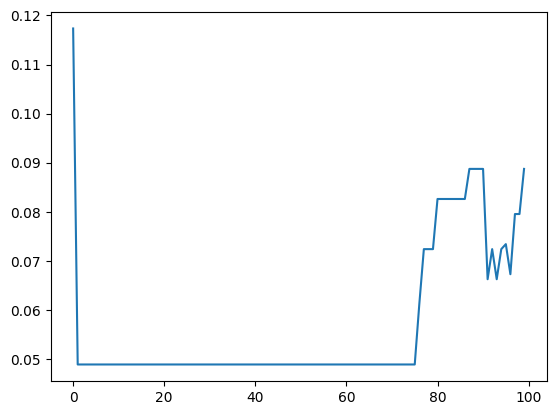

In [ ]:
error_rates=[]
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))
plt.plot(error_rates)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 60)
model.fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=60)

In [ ]:
y_predict_kmeans = model.predict(X_test)
y_predict_kmeans

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

5. Оценить их работу с помощью метрик


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy_score(y_test, y_predict_kmeans)

0.9510204081632653

In [ ]:
precision_score(y_test, y_predict_kmeans, average='macro')

0.9619047619047619

In [ ]:
recall_score(y_test, y_predict_kmeans, average='macro')

0.9396984924623115

In [ ]:
f1_score(y_test, y_predict_kmeans, average='macro')

0.9481124583046541

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_kmeans, digits = 8))

              precision    recall  f1-score   support

           0  0.92380952 1.00000000 0.96039604       582
           1  1.00000000 0.87939698 0.93582888       398

    accuracy                      0.95102041       980
   macro avg  0.96190476 0.93969849 0.94811246       980
weighted avg  0.95475219 0.95102041 0.95041876       980



6. Выбрать наилучший классификатор

LogReg

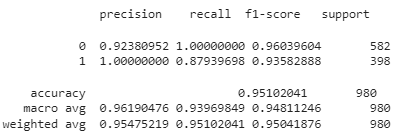

SVM

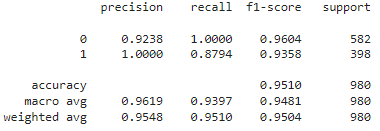

K-means


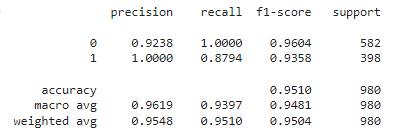